In [1]:
import wandb
import pandas as pd
import seaborn as sns
sns.set_theme()

# this will only work in the next 6 days
api = wandb.Api()
baseline_runs = api.runs('anony-mouse-462757/CytoSet', {'config.refine': False})
refined_runs = api.runs('anony-mouse-462757/CytoSet', {'config.refine': True})
baseline_histories = pd.concat(run.history() for run in baseline_runs).reset_index()
baseline_histories['model'] = 'baseline'
refined_histories = pd.concat(run.history() for run in refined_runs).reset_index()
refined_histories['model'] = 'refined'
histories = pd.concat([baseline_histories, refined_histories]).reset_index()
histories

,level_0,index,_step,val_acc,loss,_runtime,val_auc,_timestamp,val_loss,model
0,0,0,1,0.676523,7.812573,62,0.729602,1671352802,2.274584,baseline
1,1,1,2,0.679050,4.559623,65,0.746786,1671352805,3.237735,baseline
2,2,2,3,0.684610,3.841555,68,0.713164,1671352808,2.619192,baseline
3,3,3,4,0.697245,3.130998,71,0.771000,1671352811,2.260854,baseline
4,4,4,5,0.712408,2.887996,74,0.798321,1671352814,2.193208,baseline
...,...,...,...,...,...,...,...,...,...,...
913,699,36,37,0.862820,0.280604,169,0.929205,1671353502,0.361300,refined
914,700,37,38,0.848646,0.268723,172,0.929629,1671353505,0.367637,refined
915,701,38,39,0.852189,0.258946,175,0.930994,1671353508,0.370894,refined
916,702,39,40,0.853202,0.269825,178,0.929888,1671353511,0.374584,refined


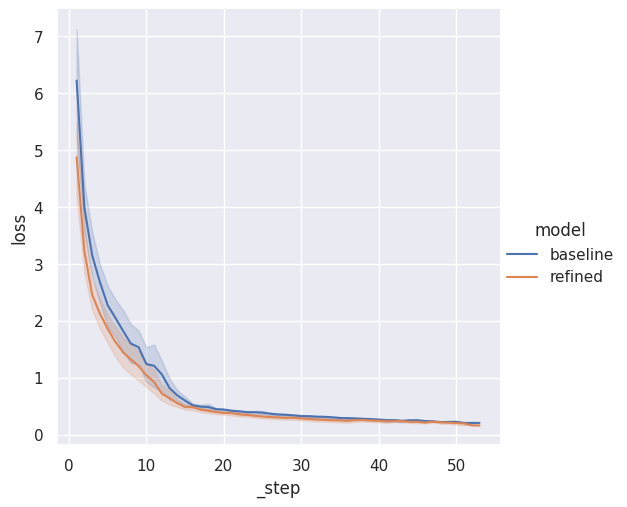

In [2]:
sns.relplot(kind='line', data=histories, x='_step', y='loss', hue='model')

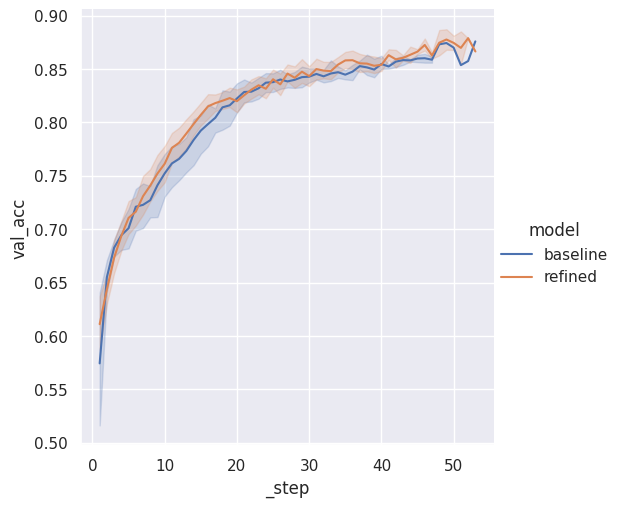

In [3]:
sns.relplot(kind='line', data=histories, x='_step', y='val_acc', hue='model')

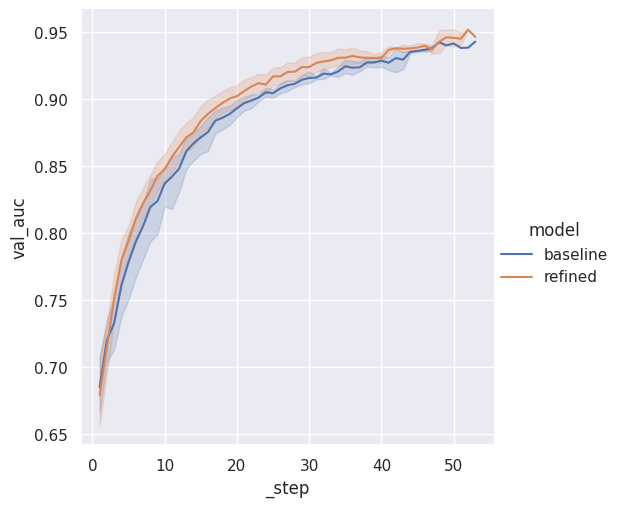

In [4]:
sns.relplot(kind='line', data=histories, x='_step', y='val_auc', hue='model')